In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load datasets
co2 = pd.read_csv('co2.csv', skiprows = 3)
gdp = pd.read_csv('GDP.csv', skiprows = 3)

# Clean up CO2 data
co2 = co2[co2['Country Name'] == 'United States']
co2.drop(['Country Name','Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
co2.rename({249: 'CO2 Emissions'}, inplace = True)
co2 = co2.transpose().dropna()

# Clean up GDP data
gdp = gdp[gdp['Country Name'] == 'United States']
gdp.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
gdp.rename({249: 'GDP'}, inplace = True)
gdp = gdp.transpose().dropna()


# Merge data and select years starting at 1970
df = co2.join(gdp)
df = df.loc['1970'::]



/Users/owner/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


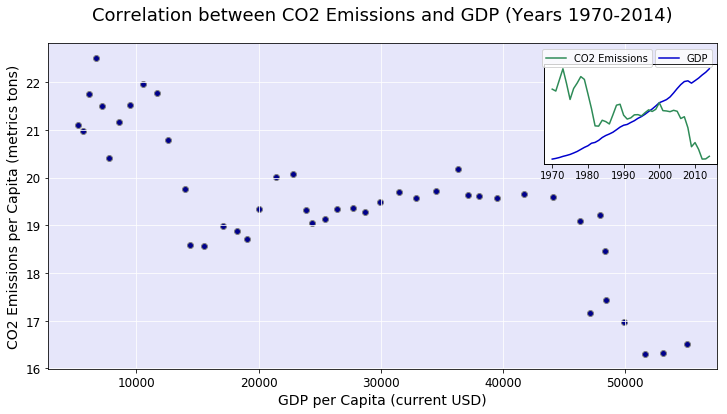

In [45]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes

# Plot scatter plot
fig = plt.figure(1, figsize = (12, 6))
fig.add_subplot(111)
plt.scatter(df['GDP'], df['CO2 Emissions'], color = 'darkblue', edgecolor = 'grey')

# Make it pretty
plt.xlabel('GDP per Capita (current USD)', fontsize = 14)
plt.ylabel('CO2 Emissions per Capita (metrics tons)', fontsize = 14)
plt.title('Correlation between CO2 Emissions and GDP (Years 1970-2014)', fontsize = 18, y = 1.05)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

ax = plt.axes()
ax.set_facecolor('lavender')
ax.grid(True, color = 'white')

# Plot time series
ax1 = fig.add_axes([0.7, 0.6, 0.2, 0.23]) #left, bottom, width, height
ax1.plot(df.index, df['GDP'], color = 'mediumblue', label = 'GDP')

ax2 = ax1.twinx()
ax2.plot(df.index, df['CO2 Emissions'], color = 'seagreen', label = 'CO2 Emissions')

# Make time series pretty
ax1.grid(False)
ax2.grid(False)

ax1.yaxis.set_major_locator(plt.NullLocator())
ax2.yaxis.set_major_locator(plt.NullLocator())
ax2.set_xticks(['1970', '1980', '1990', '2000', '2010'])

axes.Axes.legend(ax1, bbox_to_anchor=(0.5, 0.7, 0.5, 0.5));
axes.Axes.legend(ax2, bbox_to_anchor=(0.15, 0.7, 0.5, 0.5));


